# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno
import re

# 1. load data

- set `id` as index

In [2]:
df = pd.read_json('data/train.json').set_index('id') # train data
test_df = pd.read_json('data/test.json').set_index('id') # test data

In [3]:
# train data : 14271 rows × 22 columns
df

province           district        subdistrict  \
id                                                           
8448321      Bangkok           Watthana  Phra Khanong Nuea   
10936325     Bangkok           Watthana   Khlong Toei Nuea   
10927931     Bangkok        Khlong Toei         Khlong Tan   
11004792  Nonthaburi         Bang Kruai     Bang Khun Kong   
10757452  Nonthaburi  Mueang Nonthaburi          Bang Phai   
...              ...                ...                ...   
10738911  Nonthaburi  Mueang Nonthaburi         Bang Kraso   
11031178  Nonthaburi     Bang Bua Thong         Phimon Rat   
10945909     Bangkok        Saphan Sung        Saphan Sung   
10768246     Bangkok         Don Mueang          Sanam Bin   
10867776     Bangkok         Khlong San     Khlong Ton Sai   

                                   address   property_type  total_units  \
id                                                                        
8448321   36 Soi Sukhumvit 63, Ekamai Road           Condo        273.0   
10936325                       31 สุขุมวิท           Condo         74.0   
10927931  68 Sukhumvit 24 Alley, Khong Tan           Condo        940.0   
11004792                    Bang Khun Kong  Detached House          NaN   
10757452                 พระราม5-นครอินทร์       Townhouse          NaN   
...                                    ...             ...          ...   
10738911                 36/2 รัตนาธิเบศร์           Condo        648.0   
11031178                         Phimonrat       Townhouse          NaN   
10945909              Soi Ramkhamhaeng 164  Detached House        300.0   
10768246                     วิภาวดีรังสิต       Townhouse          NaN   
10867776               Krung Thonburi Road           Condo        365.0   

          bedrooms  baths  floor_area  floor_level  ...   longitude  \
id                                                  ...               
8448321        2.0    2.0          66         10.0  ...  100.584850   
10936325       1.0    1.0          49          8.0  ...  100.566949   
10927931       1.0    1.0          34          4.0  ...  100.565660   
11004792       3.0    3.0         170          NaN  ...  100.428438   
10757452       3.0    2.0         120          NaN  ...  100.494129   
...            ...    ...         ...          ...  ...         ...   
10738911       2.0    1.0          58          NaN  ...  100.504931   
11031178       3.0    2.0          85          1.0  ...  100.359562   
10945909       3.0    3.0         170          NaN  ...  100.712196   
10768246       2.0    2.0         150          NaN  ...  100.573063   
10867776       1.0    1.0          40         26.0  ...  100.496396   

          nearby_stations                            nearby_station_distance  \
id                                                                             
8448321                 2    [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]   
10936325                3  [[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...   
10927931                2  [[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...   
11004792                0                                               None   
10757452                1                 [[PP09 Yaek Nonthaburi 1 MRT, 10]]   
...                   ...                                                ...   
10738911                2  [[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...   
11031178                0                                               None   
10945909                0                                               None   
10768246                0                                               None   
10867776                2  [[S8 Wongwian Yai BTS, 200], [G1/S7 Krung Thon...   

          nearby_bus_stops nearby_supermarkets  nearby_shops  year_built  \
id                                                                         
8448321                NaN                16.0            20        2011   
10936325               NaN          

In [4]:
# test data : 2500 rows × 21 columns
test_df

province             district        subdistrict  \
id                                                               
10317868  Samut Prakan            Bang Phli      Bang Phli Yai   
10885829       Bangkok           Nong Khaem    Nong Khang Phlu   
10765951       Bangkok          Huai Khwang        Huai Khwang   
10003549       Bangkok          Khlong Toei         Khlong Tan   
10663026       Bangkok               Lak Si    Thung Song Hong   
...                ...                  ...                ...   
10889363       Bangkok             Bang Rak  Maha Phruettharam   
10975839       Bangkok               Sathon     Thung Maha Mek   
10986832       Bangkok           Bang Phlat       Bang Yi Khan   
10687627  Samut Prakan  Mueang Samut Prakan       Samrong Nuea   
10910437       Bangkok           Chom Thong           Bang Kho   

                                            address   property_type  \
id                                                                    
10317868                         Nam Daeng Road Yai  Detached House   
10885829                             Machareon Road  Detached House   
10765951                                  72 Rama 9           Condo   
10003549              772 Sukhumvit Road, Khong Tan           Condo   
10663026                       222 Ngamwongwan Road           Condo   
...                                             ...             ...   
10889363                        660-662 Rama 4 Road           Condo   
10975839           88 Narathiwatratchanakharin Road           Condo   
10986832  1521 Soi Arun Amarin 53, Arun Amarin Road           Condo   
10687627                  Thang Rotfai Sai Kao Road           Condo   
10910437                          Ratchaphruek Road           Condo   

          total_units  bedrooms  baths  floor_area  floor_level  ...  \
id                                                               ...   
10317868        800.0       4.0    3.0         120          NaN  ...   
10885829        107.0       4.0    3.0         188          NaN  ...   
10765951        433.0       1.0    1.0          22         23.0  ...   
10003549        656.0       1.0    1.0          41          5.0  ...   
10663026       1458.0       1.0    1.0          29         25.0  ...   
...               ...       ...    ...         ...          ...  ...   
10889363       1598.0       1.0    1.0          33         12.0  ...   
10975839        493.0       1.0    1.0          65         33.0  ...   
10986832       1121.0       1.0    1.0          42         10.0  ...   
10687627        719.0       1.0    1.0          28          8.0  ...   
10910437       1004.0       1.0    1.0          30         18.0  ...   

           latitude   longitude  nearby_stations  \
id                                                 
10317868  13.614196  100.680610                0   
10885829  13.702222  100.341833                0   
10765951  13.755713  100.566385                3   
10003549  13.724295  100.577202                1   
10663026  13.855437  100.547923                0   
...             ...         ...              ...   
10889363  13.733237  100.526269                2   
10975839  13.719377  100.531092                3   
10986832  13.772913  100.492732                1   
10687627  13.653037  100.592954                1   
10910437  13.712949  100.467945                2   

                                    nearby_station_distance nearby_bus_stops  \
id                                                                             
10317868                                               None              NaN   
10885829                                               None             20.0   
10765951  [[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...              NaN   
10003549                            [[E6 Thong Lo BTS, 70]]             20.0   
10663026                                               None             20.0   
...                                                     .

# 2. EDA

## 2.1. Missing Values

- `total_units`, `floor_level`, `land_area`, `nearby_station_distance`, `nearby_bus_stops`, `month_built` have a lot of null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 8448321 to 10867776
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   province                 14271 non-null  object 
 1   district                 14271 non-null  object 
 2   subdistrict              14260 non-null  object 
 3   address                  14271 non-null  object 
 4   property_type            14271 non-null  object 
 5   total_units              10509 non-null  float64
 6   bedrooms                 14228 non-null  float64
 7   baths                    14236 non-null  float64
 8   floor_area               14271 non-null  int64  
 9   floor_level              8093 non-null   float64
 10  land_area                4917 non-null   float64
 11  latitude                 14271 non-null  float64
 12  longitude                14271 non-null  float64
 13  nearby_stations          14271 non-null  int64  
 14  nearby_statio

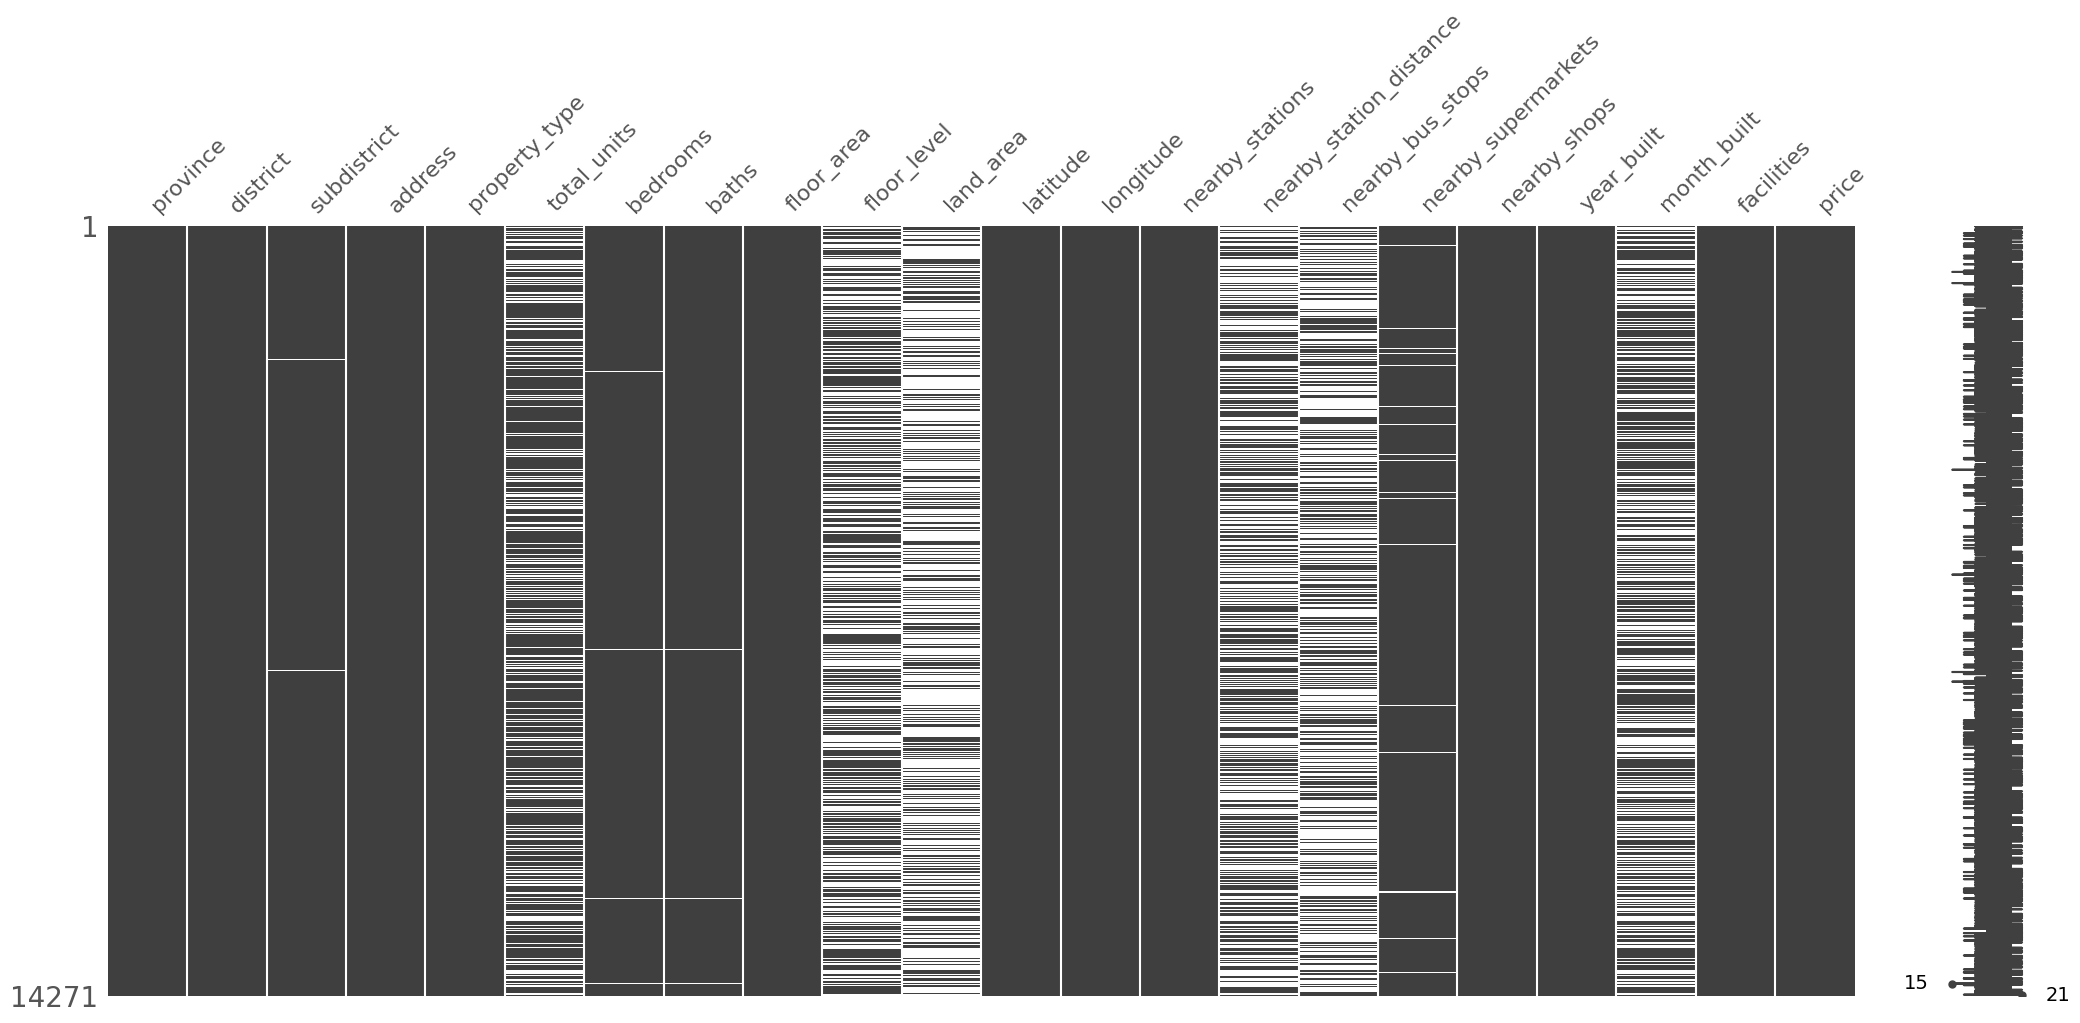

In [5]:
df.info()
msno.matrix(df);

## 2.2. distribution of target value : `price`

- range 0 - 10M Baht
- right skewed

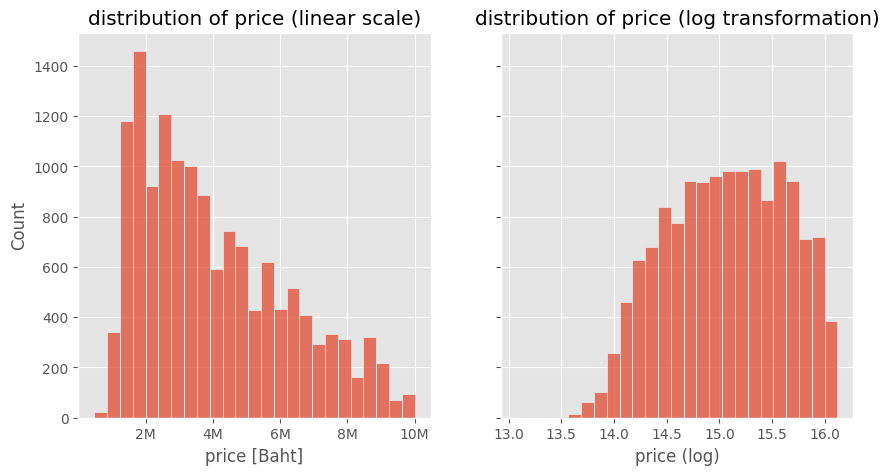

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# linear scale : right skewed
sns.histplot(df['price'], ax=axes[0], bins=25)
axes[0].set_xticks(np.arange(2e6, 11e6, 2e6))
axes[0].set_xticklabels(['2M','4M','6M','8M','10M'])
axes[0].set_title('distribution of price (linear scale)')
axes[0].set_xlabel('price [Baht]')

# log transformation : less skewed
sns.histplot(np.log(df['price']), ax=axes[1], bins=25)
axes[1].set_title('distribution of price (log transformation)');
axes[1].set_xlabel('price (log)');

- make a new column `price_log`

In [7]:
df['price_log'] = np.log(df['price'])

## 2.3. categorical features

- `property_type`
- `province`
- `district`
- `subdistrict`
- `address`
- `nearby_station_distance` (pair of [station name, distance])
- `month_built`
- `facilities` (list)

### `property type`

- Condo in Bangkok is majority in data

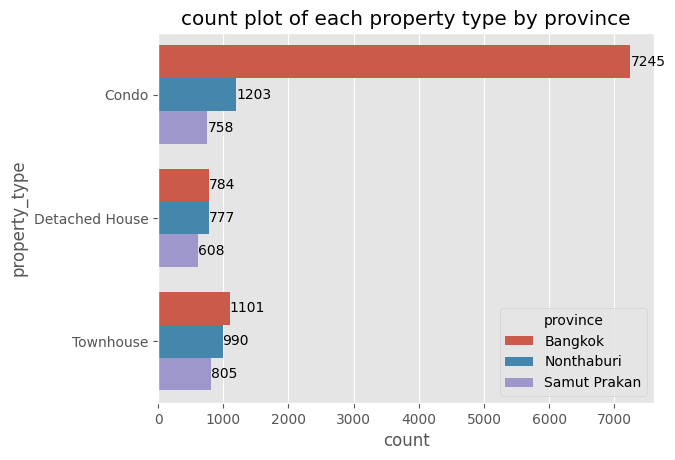

In [8]:
ax = sns.countplot(y='property_type', hue="province", data=df)
for i in range(3):
    ax.bar_label(ax.containers[i])
plt.title('count plot of each property type by province');

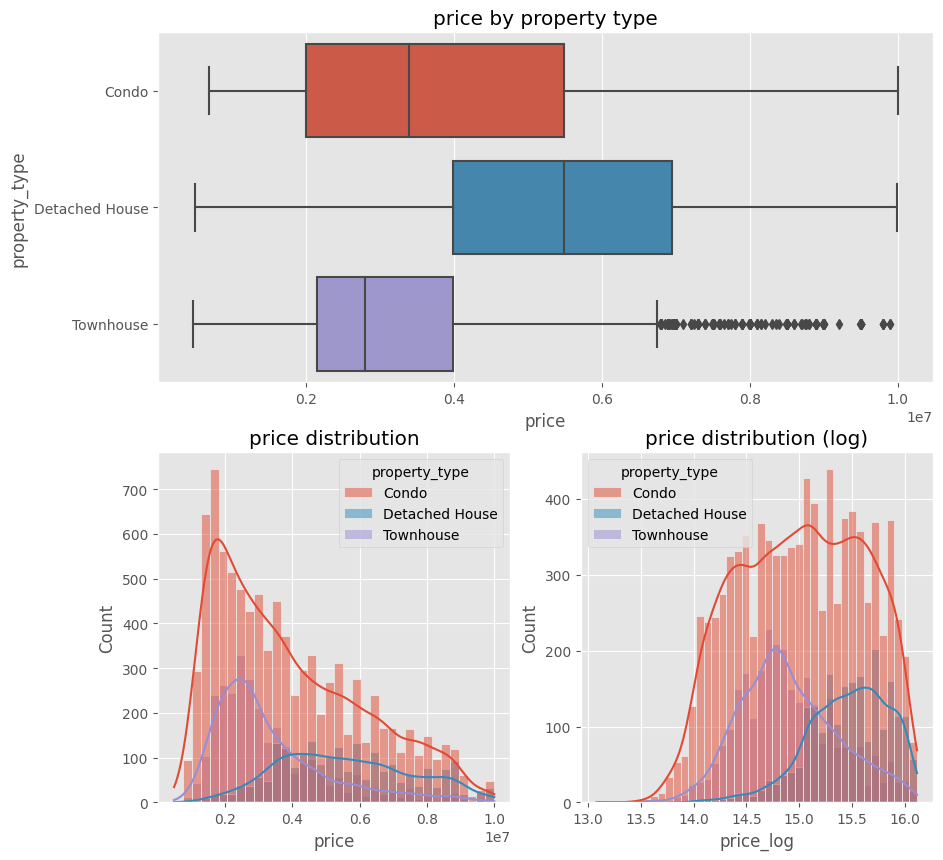

In [9]:
# boxplot and distribution of price by property type
fig, axes = plt.subplot_mosaic("AA;BC", figsize=(10, 10))

sns.boxplot(x="price", y='property_type', ax=axes['A'], data=df)
axes['A'].set_title('price by property type')

sns.histplot(x="price", hue='property_type', ax=axes['B'], kde=True, data=df)
axes['B'].set_title('price distribution')

sns.histplot(x="price_log", hue='property_type', ax=axes['C'], kde=True, data=df)
axes['C'].set_title('price distribution (log)');

### `province`

- price in Bangkok is the highest
- Samut Prakan and Nonthaburi are similar

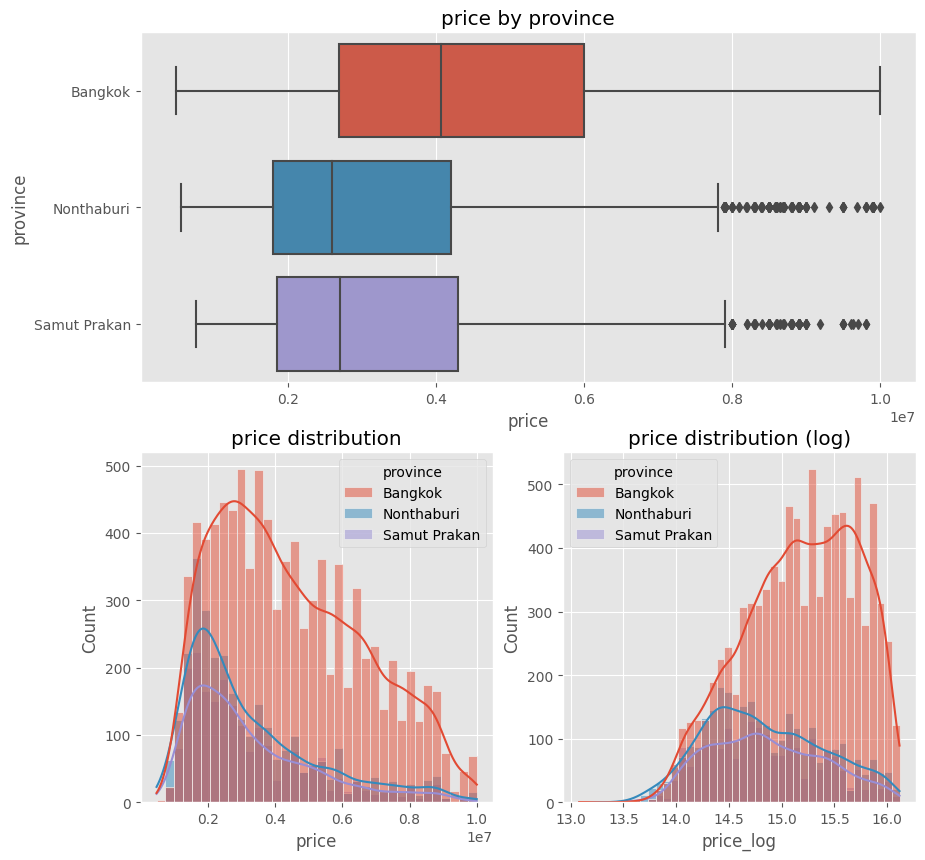

In [10]:
# boxplot and distribution of price by province
fig, axes = plt.subplot_mosaic("AA;BC", figsize=(10, 10))

sns.boxplot(x="price", y='province', ax=axes['A'], data=df)
axes['A'].set_title('price by province')

sns.histplot(x="price", hue='province', ax=axes['B'], kde=True, data=df)
axes['B'].set_title('price distribution')

sns.histplot(x="price_log", hue='province', ax=axes['C'], kde=True, data=df)
axes['C'].set_title('price distribution (log)');

### `district`

- countplot : very wide range : 12 to 1174

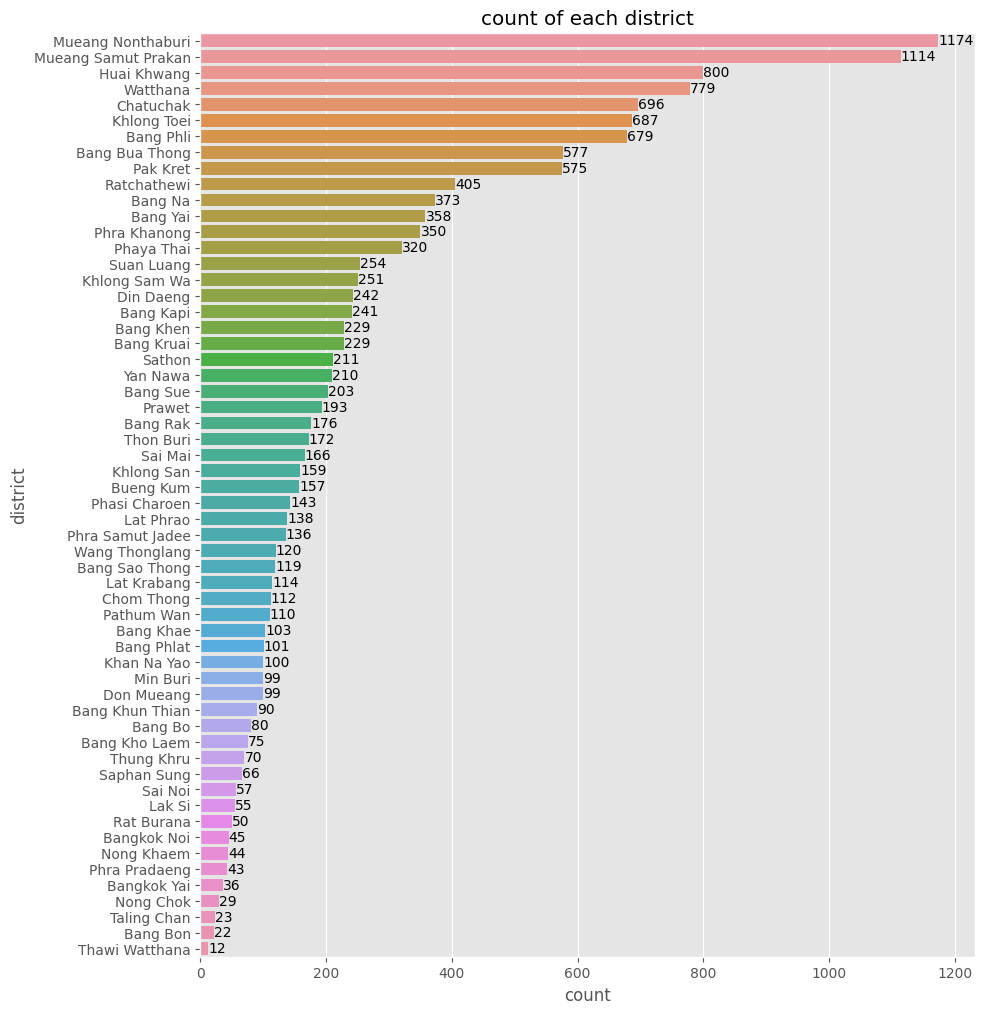

In [11]:
plt.figure(figsize=(10,12))
order = df['district'].value_counts().index
ax = sns.countplot(y='district', data=df, order=order)
ax.bar_label(ax.containers[0])
plt.title('count of each district');

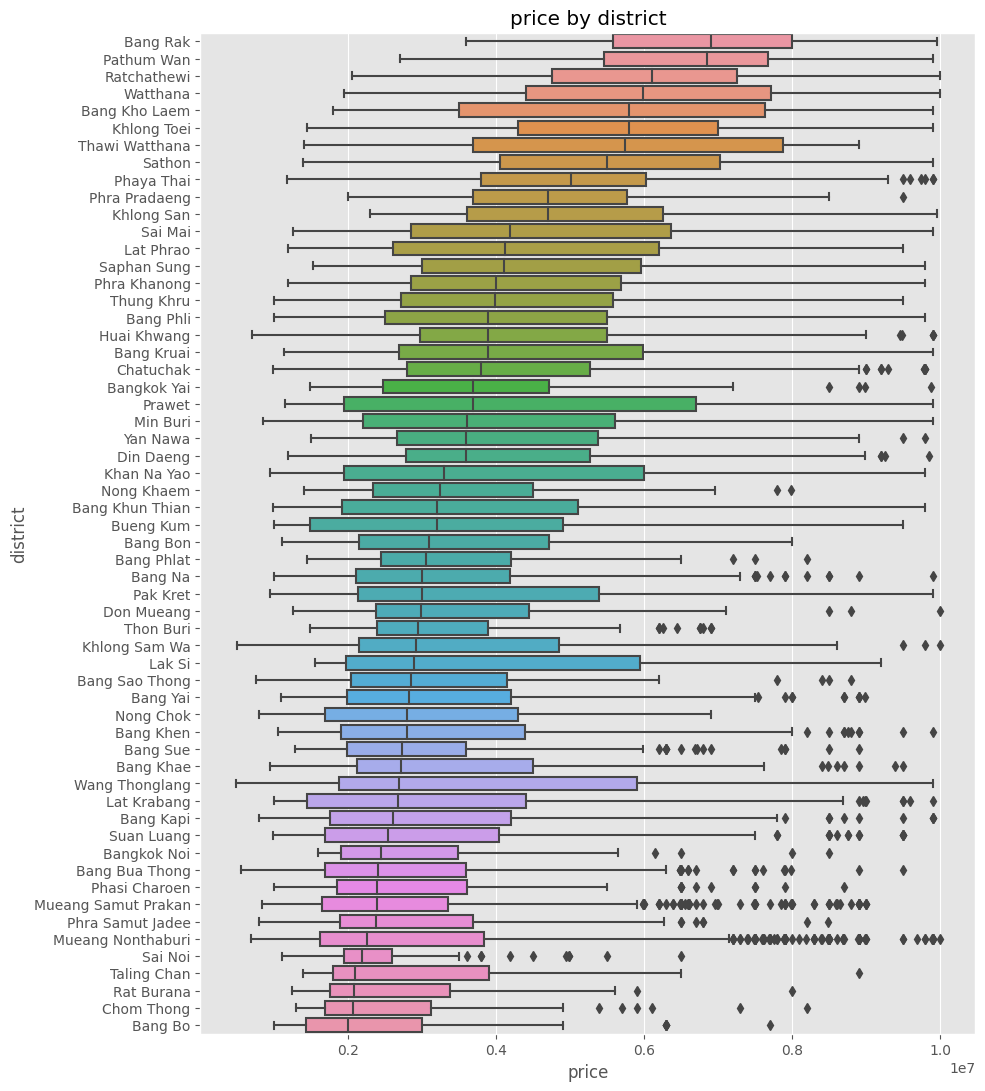

In [12]:
## boxplot by district
plt.figure(figsize=(10,13))
district_order = df.groupby('district')['price'].median().sort_values(ascending=False).index
sns.boxplot(x="price", y='district', data=df, order=district_order)
plt.title('price by district');

- check whether the number of districts in train data and test data are same
- if differs, `pd.get_dummies()` doesn't generate the same X

In [13]:
print('number of districts in TRAIN :', df.district.nunique())
print('number of districts in TEST  :', test_df.district.nunique())

number of districts in TRAIN : 58
number of districts in TEST  : 58


### `subdistrict`

- 11 null / 14,271 records
- 239 unique values
- there are many values with a single record - possibility of overfitting
- some values are incorrect e.g. "Whizdom The Exclusive"

In [14]:
df['subdistrict'].value_counts()

Samrong Nuea             465
Bang Kraso               432
Huai Khwang              418
Phra Khanong             392
Bang Na                  373
                        ... 
Khu Fang Nuea              1
Nong Phrao Ngai            1
Chimphli                   1
Bang Phrom                 1
Whizdom The Exclusive      1
Name: subdistrict, Length: 239, dtype: int64

- use `bangkok_district.csv` to check invalid values
- 222 records with invalid value, including 11 null records

In [15]:
district_df = pd.read_csv('data/bangkok_district.csv')
invalid_subdistrict = df[~df['subdistrict'].isin(district_df['subdistrict'])]['subdistrict'] # ~ means "NOT"

print('num of invalid subdistrict : ', len(invalid_subdistrict))
invalid_subdistrict.unique()

num of invalid subdistrict :  222


array(['Noble Revolve Ratchada', 'Vio Khaerai 2', 'ASHTON Silom',
       'The Mark Ratchada-Airport Link', 'Life Asoke - Rama 9',
       'Lumpini Suite Dindaeng-Ratchaprarop', 'The Alcove Sukhumvit 49',
       'The Kris Express 2', 'IDEO Thaphra Interchange',
       'Supalai Park Ratchayothin', 'The Bloom Sukhumvit 71',
       'Kensington Condominium', 'Smart Condo Rama 2',
       'Supalai Premier Ratchada-Narathiwas-Sathorn', 'Villa Sathorn',
       'StarView Rama 3', 'Plum Condo Chaengwattana Station', None,
       'Baan Suanthon Srinakarin condominium', 'Baan Nonsi',
       'The Kris Extra 5', 'CU Terrace', 'Beverly Tower',
       'NUE Noble Chaengwattana', 'Chateau In Town Ratchada 20',
       'DOUBLELAKE เมืองทองธานี CONDOMINIUM', 'Sathorn Happy Land',
       'M Silom', '624 Condolette Ladprao', 'Whizdom The Exclusive'],
      dtype=object)

### `address`

- 2619 unique values
- messy data - some have soi number, some are full address
- it may be possible to use regular expression to extract street name, but time-spending

In [16]:
df['address'].value_counts()

Sukhumvit Road                                        177
Rattanathibet Road                                    168
Bang Phli Yai                                          80
Chaeng Watthana Road                                   74
Ladprao Road                                           73
                                                     ... 
997/120 กาญจนาภิเษก                                     1
ถนนไทยรามัญ                                             1
เลขที่ 135/312 หมู่บ้านพฤกษา 118 เลียบวารี- มีนบุร      1
Soi Chaeng Watthana 9-1, Kamphaeng Phet Road 6          1
พระยาสุเรนทร์30                                         1
Name: address, Length: 2619, dtype: int64

In [17]:
# extract "Sukhumvit" with collections.Counter
sukhumvit_count = Counter()

for address in df['address']:
    if re.search(r'(Sukhumvit|สุขุมวิท)', address, flags=re.I): # flags=re.I means case-insensitive
        sukhumvit_count[address] += 1

sukhumvit_count.most_common(10)

[('Sukhumvit Road', 177),
 ('Sukhumvit', 55),
 ('Sukhumvit 115 Road', 51),
 ('55 Soi Sukhumvit 36, Sukhumvit Road', 49),
 ('1 Soi Piyibut 1, Sukhumvit Road', 42),
 ('Soi Sukhumvit 48', 41),
 ('Sukhumvit 107 Road', 40),
 ('Sukhumvit 24 Road, Khong Tan', 37),
 ('3009 Sukhumvit 101 Road', 34),
 ('772 Sukhumvit Road, Khong Tan', 33)]

### `nearby_station_distance`

- 7,043 null / 14,271 records
- list of list
- contains many None
- use `collections.Counter()` and make the list of stations - 140 unique values

In [18]:
df['nearby_station_distance'].head()

id
8448321       [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]
10936325    [[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...
10927931    [[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...
11004792                                                 None
10757452                   [[PP09 Yaek Nonthaburi 1 MRT, 10]]
Name: nearby_station_distance, dtype: object

In [19]:
station_count = Counter()
for row in df['nearby_station_distance']:
    if type(row) != list: # skip raws with None
        pass
    else:
        for station_name, distance in row:
            station_count[station_name] += 1

# convert the result to DataFrame
station_df = pd.DataFrame(station_count.most_common(), columns=['station', 'count'])
station_df

station  count
0               E9 On Nut BTS    426
1                 E4 Asok BTS    384
2    A6 Makkasan Airport Link    367
3             E6 Thong Lo BTS    349
4         BL20 Phra Ram 9 MRT    349
..                        ...    ...
135      RW06 SRT Taling Chan      3
136    S7 Krung Thon Buri BTS      3
137       BL32 Itsaraphap MRT      3
138        RN08 SRT Don Muang      1
139          N24 Khu Khot BTS      1

[140 rows x 2 columns]

### `month_built`

- there seems to be no difference - maybe useless feature
- We can conduct a hypothesis testing (e.g. ANOVA) to determine whether mean of each month differs or not
- But the more the number of samples, the smaller the p-value. So the result of hypothesis testing is not so reliable

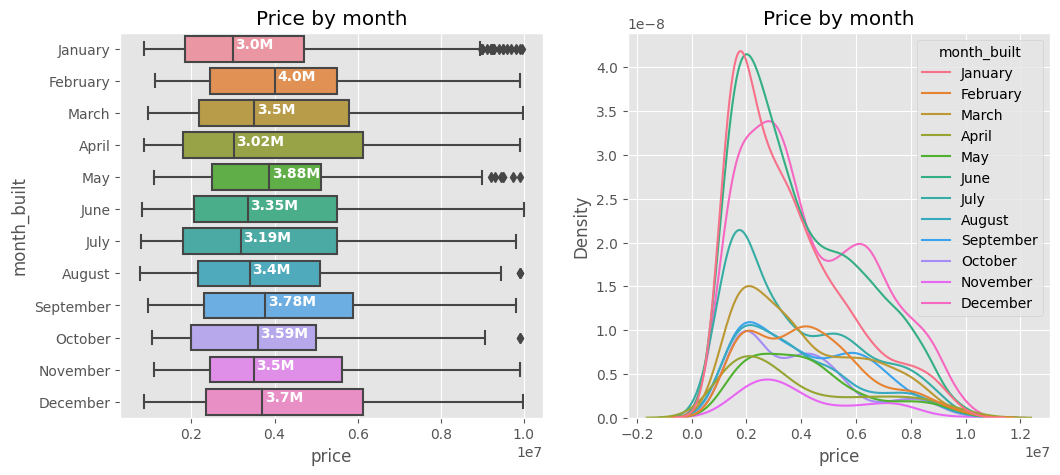

In [20]:
order = ['January','February','March','April','May','June','July','August','September','October','November','December']

medians = df.groupby('month_built')['price'].median()[order] # median of price by month
median_label = [str(round(x, 2))+'M' for x in medians/10e5] # convert numeric data into string: 3250000 -> 3.25M

plt.figure(figsize=(12,5))

## boxplot
plt.subplot(1,2,1)
ax = sns.boxplot(x="price", y='month_built', data=df, order=order)
for ytick, label in zip(ax.get_yticks(), median_label): # set median values
    ax.text(x=medians[ytick]*1.02, y=ytick, s=label, color='w', weight='semibold')
plt.title('Price by month')

## kdeplot
plt.subplot(1,2,2)
sns.kdeplot(x='price', hue='month_built', data=df,  hue_order=order)
plt.title('Price by month');

### `facility`

- need to create a set of facilities - `collections.Counter()`
- some facilities are similar e.g. **Covered car park** and **Car Park**

In [21]:
facility_count = Counter()

for fac_list in df.facilities:
    facility_count.update(fac_list)

print('UNIQUE :', len(facility_count))
facility_count.most_common(20)

UNIQUE : 65


[('24 hours security', 11675),
 ('CCTV', 10504),
 ('Swimming pool', 9993),
 ('Fitness corner', 9148),
 ('Covered car park', 6182),
 ('Car Park', 5533),
 ('Community Garden', 3528),
 ('Lift lobby', 3195),
 ('Gymnasium room', 2661),
 ('Clubhouse', 2492),
 ('Library', 2251),
 ('Mini-Mart', 2121),
 ('Sauna', 2053),
 ('Playground', 2045),
 ('Steam bath', 1345),
 ('Wading pool', 1342),
 ('Sky Lounge', 1322),
 ('Lounge', 1023),
 ('Launderette', 966),
 ('Open car park', 901)]

## 2.4. numerical features

- `total_units` - with many null
- `bedrooms`
- `baths`
- `floor_area`
- `floor_level` - with many null
- `land_area` - with many null
- `nearby_stations`
- `nearby_bus_stops` - with many null
- `nearby_supermarkets`
- `nearby_shops`
- `year_built`

In [22]:
df.isna().sum()

province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
price_log                     0
dtype: int64

### `total_units`

- 3,762 null / 14,271 records
- it seems to be less important feature for **Detached House** and **Townhouse**

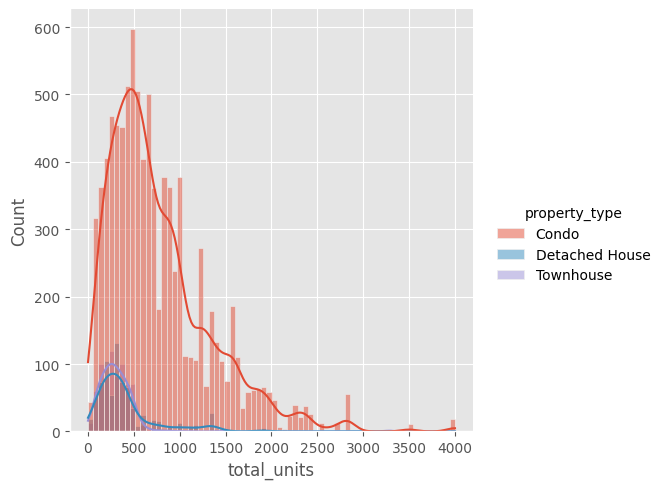

In [23]:
sns.displot(x="total_units", hue='property_type', kde=True, data=df);

### `bedrooms` 

- 43 null / 14,271 records
- most of condo have only one room
- mode = 3 for Detached House and Townhouse

bedrooms        1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
property_type                                                             
Condo           7499  1650    32     1     2     0     0     1     0     0
Detached House    14    99  1361   562    83    29     6     1     1     2
Townhouse         23   578  1775   451    39    13     1     3     1     1

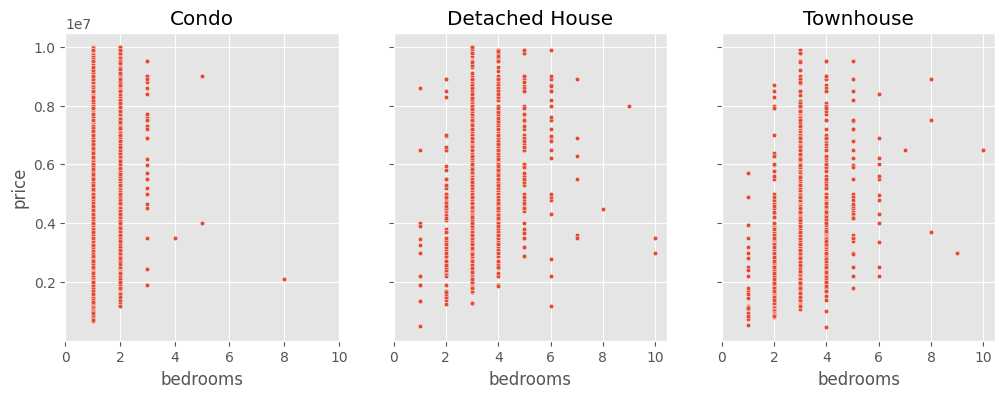

In [24]:
# scatter plot by property type
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
property_types = ['Condo', 'Detached House', 'Townhouse']

for i, p in enumerate(property_types):
    sns.scatterplot(x='bedrooms', y='price', ax=axes[i], s=10, data=df[df.property_type==p])
    axes[i].set_title(p)
    axes[i].set_xticks(range(0,11,2))

# value count
df.groupby('property_type')['bedrooms'].value_counts().unstack(fill_value=0)

### `baths`

- 35 null / 14,271 records
- similar distribution with `bedrooms`

baths           0.0   1.0   2.0   3.0  4.0  5.0  6.0  7.0  8.0  9.0
property_type                                                      
Condo            16  8165   992    12    1    0    0    0    1    0
Detached House    3    58   842  1054  146   43   11    1    2    1
Townhouse         2    95  1741   789  220   32    7    2    0    0

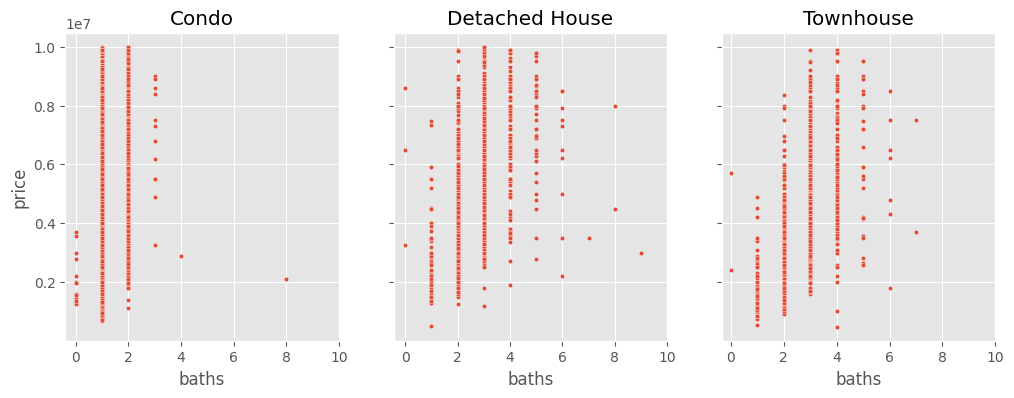

In [25]:
# scatter plot by property type
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
property_types = ['Condo', 'Detached House', 'Townhouse']

for i, p in enumerate(property_types):
    sns.scatterplot(x='baths', y='price', ax=axes[i], s=10, data=df[df.property_type==p])
    axes[i].set_title(p)
    axes[i].set_xticks(range(0,11,2))

# value count
df.groupby('property_type')['baths'].value_counts().unstack(fill_value=0)

### `floor_area`

- each property type shows different distribution
- `price` and `floor_area` has positive correlation
- some outliers e.g. floor_area > 200 @condo
- odd values e.g. floor_area = 0 @Townhouse

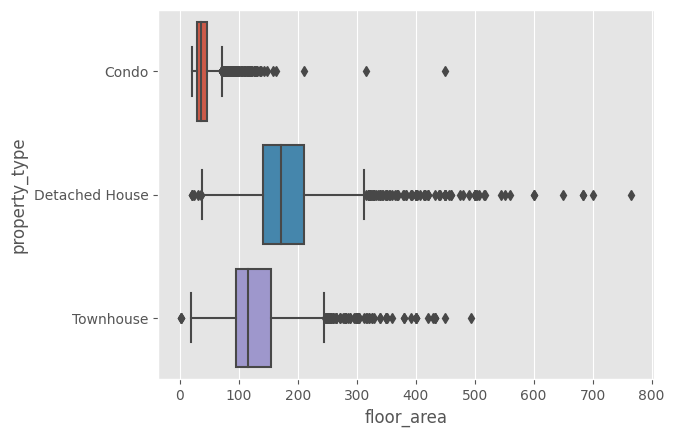

In [26]:
sns.boxplot(x="floor_area", y='property_type', data=df);

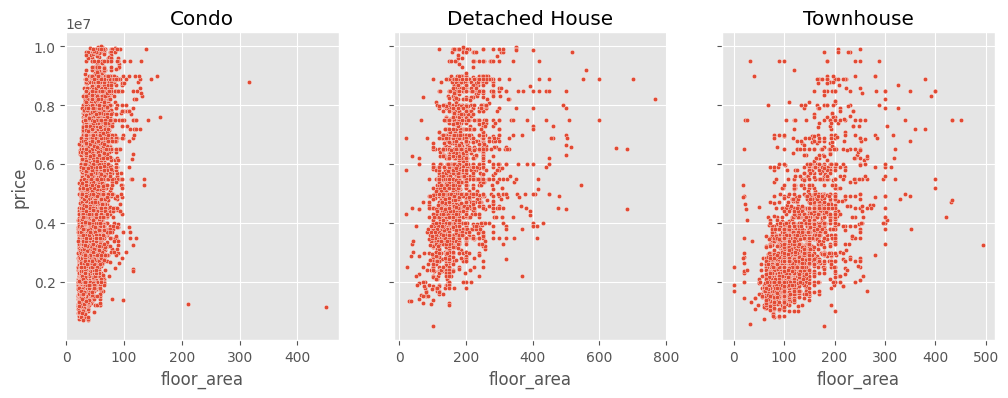

In [27]:
# scatter plot by property type
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
property_types = ['Condo', 'Detached House', 'Townhouse']

for i, p in enumerate(property_types):
    sns.scatterplot(x='floor_area', y='price', ax=axes[i], s=10, data=df[df.property_type==p])
    axes[i].set_title(p)

### `floor_level`

- 5,852 null / 14,271 records
- median of Condo : 9, median of Townhouse : 2

In [28]:
# number of null by property type
df['floor_level'].isna().groupby(df['property_type']).sum()

property_type
Condo             1858
Detached House    1845
Townhouse         2475
Name: floor_level, dtype: int64

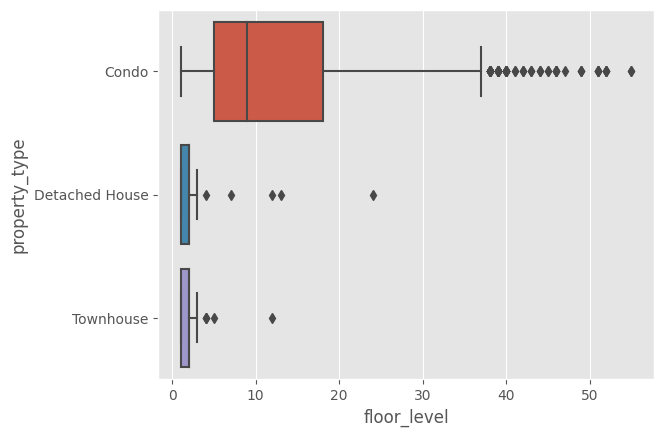

In [29]:
# distribution by property type
sns.boxplot(x="floor_level", y='property_type', data=df);

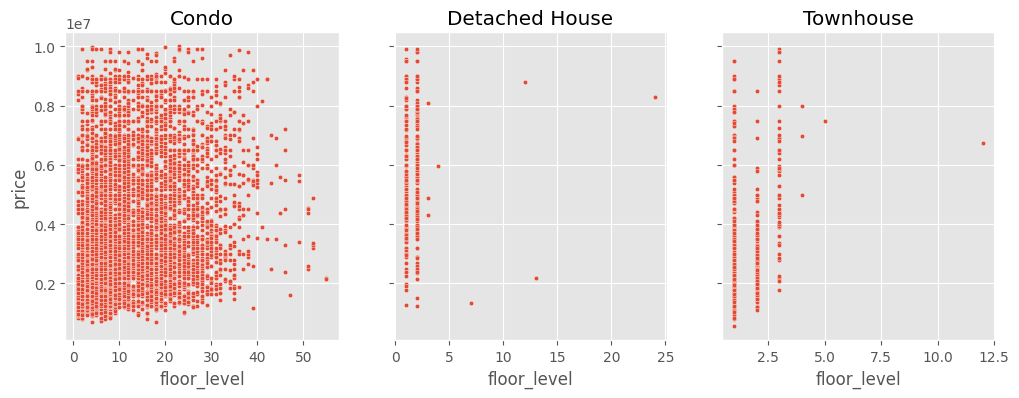

In [30]:
# scatter plot by property type
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
property_types = ['Condo', 'Detached House', 'Townhouse']

for i, p in enumerate(property_types):
    sns.scatterplot(x='floor_level', y='price', ax=axes[i], s=10, data=df[df.property_type==p])
    axes[i].set_title(p)

### `land_area`

- 9,270 null / 14,271 records
- Condo has no value
- some outliers - use only "less than 1000" may be enough

In [31]:
# count of null by property type
pd.DataFrame({
    'non-null': df['land_area'].notna().groupby(df['property_type']).sum(),
    'null': df['land_area'].isna().groupby(df['property_type']).sum()})

non-null  null
property_type                 
Condo                  0  9206
Detached House      2114    55
Townhouse           2803    93

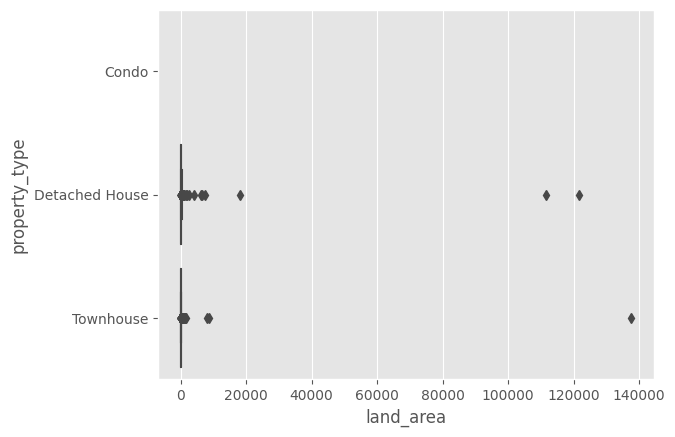

In [32]:
# boxplot
sns.boxplot(x="land_area", y='property_type', data=df);

In [33]:
df[df.land_area < 1000].groupby('property_type')['floor_level'].count()

property_type
Detached House    313
Townhouse         401
Name: floor_level, dtype: int64

< 1000  ≧ 1000
property_type                 
Detached House    2101      13
Townhouse         2797       6

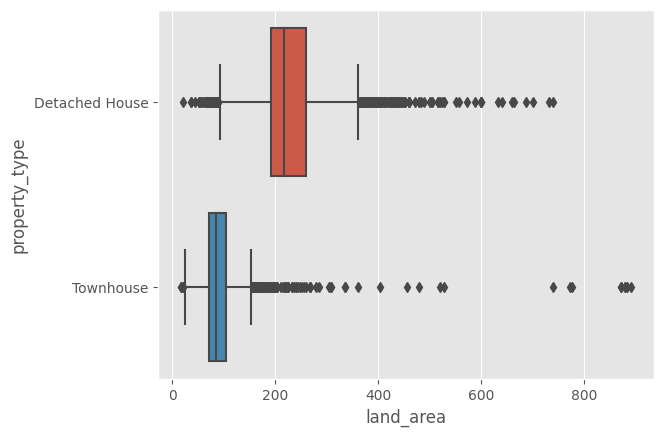

In [34]:
# boxplot : less than 1000 sqm
sns.boxplot(x="land_area", y='property_type', data=df[df.land_area < 1000]);

# count of "less than 1000 sqm" and "more than 1000 sqm"
pd.DataFrame({
    '< 1000': df[df.land_area < 1000].groupby('property_type')['land_area'].count(),
    '≧ 1000': df[df.land_area >= 1000].groupby('property_type')['land_area'].count()
})

### `nearby_stations`

- no null
- the more stations, the higher the price

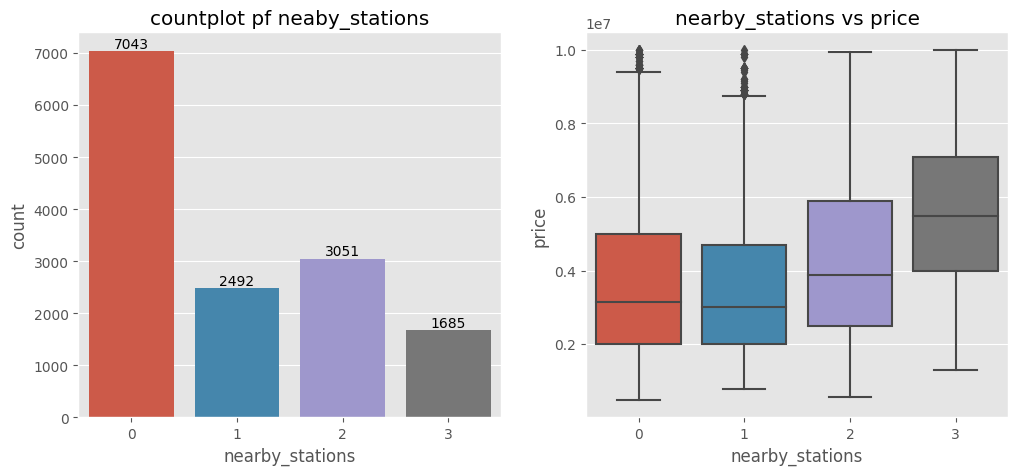

In [35]:
plt.figure(figsize=(12,5))

# countplot
plt.subplot(1,2,1)
ax = sns.countplot(x='nearby_stations', data=df)
ax.bar_label(ax.containers[0])
plt.title('countplot pf neaby_stations')

# boxplot
plt.subplot(1,2,2)
sns.boxplot(x='nearby_stations', y='price', data=df)
plt.title('nearby_stations vs price');

### `nearby_bus_stops`

- 7,984 null / 14,271 records
- 20 is the dominant value in data - it might mean "20 or more"
- it seems to have no correlation with price

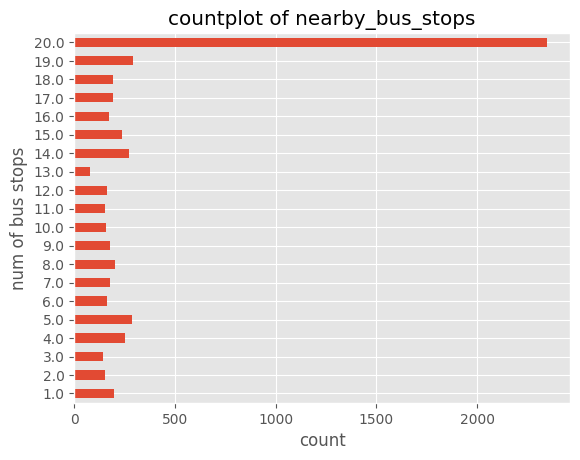

In [36]:
# countplot
df['nearby_bus_stops'].value_counts().sort_index().plot(kind="barh")
plt.title('countplot of nearby_bus_stops')
plt.ylabel('num of bus stops'); plt.xlabel('count');

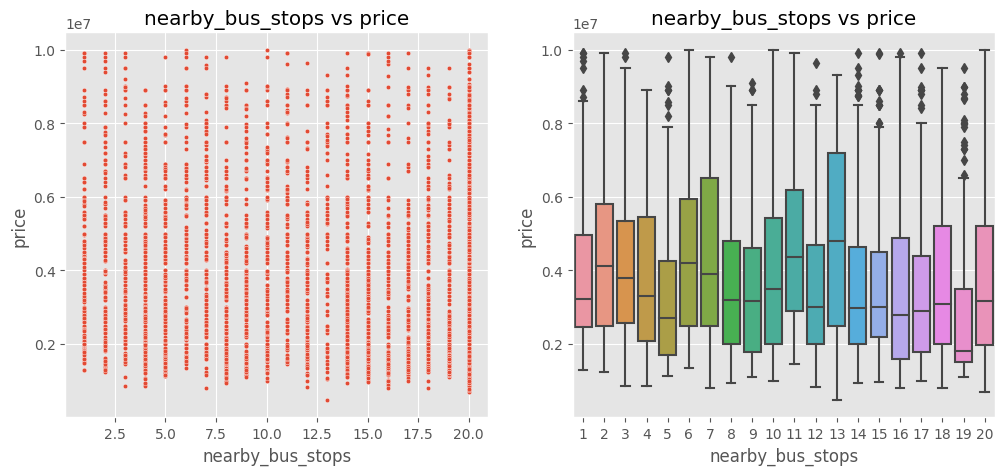

In [37]:
plt.figure(figsize=(12, 5))

# scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='nearby_bus_stops', y='price', s=10, data=df)
plt.title('nearby_bus_stops vs price');

# box plot
plt.subplot(1, 2, 2)
ax = sns.boxplot(x='nearby_bus_stops', y='price', data=df)
ax.set_xticklabels(np.arange(1,21))
plt.title('nearby_bus_stops vs price');

### `nearby_supermarkets`

- 386 null / 14,271 records
- null might be 0, since there is no 0 in data
- mode : 6
- 20 might mean "20 or more"
- it seems to have weak corrleation with `price`



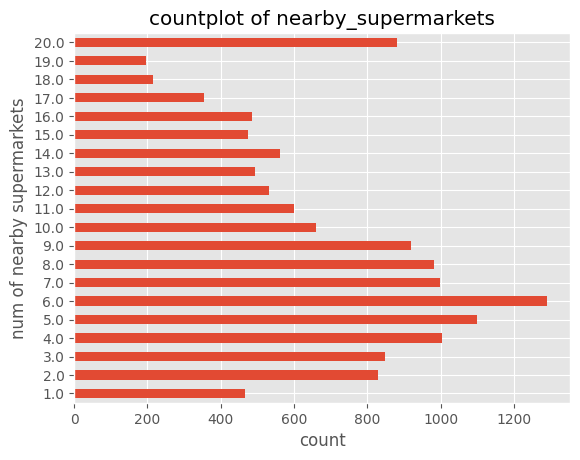

In [38]:
# countplot
df['nearby_supermarkets'].value_counts().sort_index().plot(kind="barh")
plt.title('countplot of nearby_supermarkets');
plt.ylabel('num of nearby supermarkets'); plt.xlabel('count');

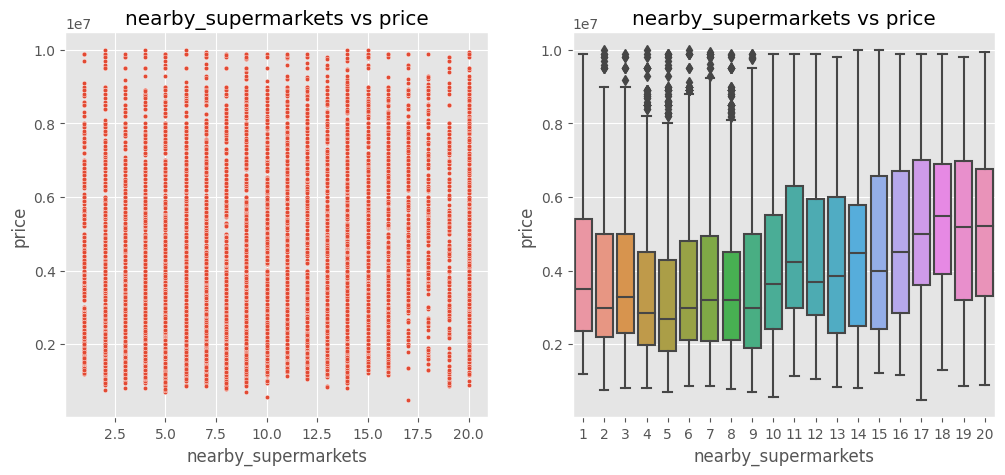

In [39]:
plt.figure(figsize=(12, 5))

# scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='nearby_supermarkets', y='price', s=10, data=df)
plt.title('nearby_supermarkets vs price');

# box plot
plt.subplot(1, 2, 2)
ax = sns.boxplot(x='nearby_supermarkets', y='price', data=df)
ax.set_xticklabels(np.arange(1,21))
plt.title('nearby_supermarkets vs price');

### `nearby_shops`

- no null
- mode : 1
- 20 might mean "20 or more"
- it seems to have weak corrleation with `price`

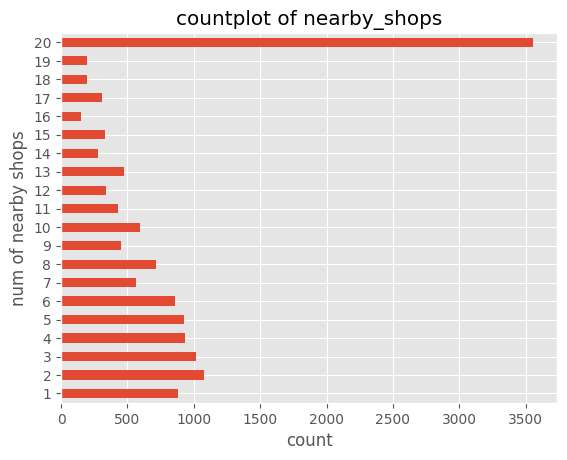

In [40]:
# countplot
df['nearby_shops'].value_counts().sort_index().plot(kind="barh")
plt.title('countplot of nearby_shops');
plt.ylabel('num of nearby shops'); plt.xlabel('count');

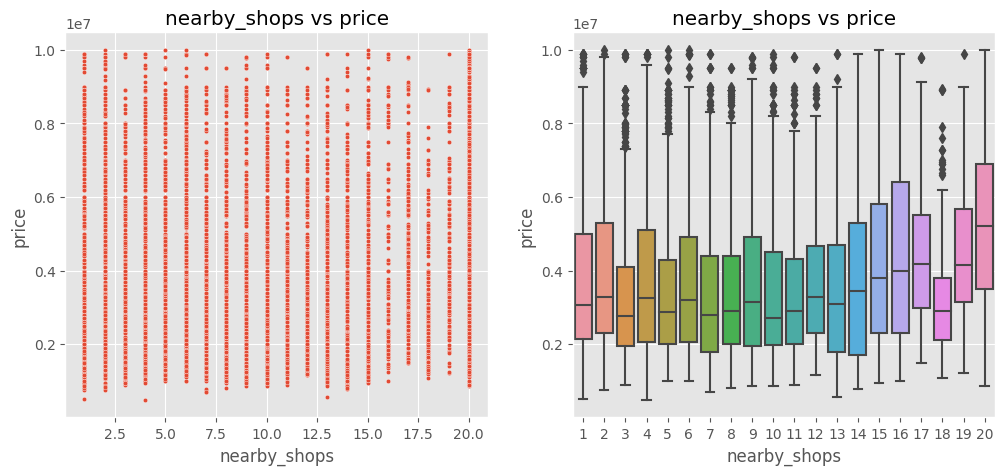

In [41]:
plt.figure(figsize=(12, 5))

# scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='nearby_shops', y='price', s=10, data=df)
plt.title('nearby_shops vs price');

# box plot
plt.subplot(1, 2, 2)
ax = sns.boxplot(x='nearby_shops', y='price', data=df)
ax.set_xticklabels(np.arange(1,21))
plt.title('nearby_shops vs price');

### `year_built`

- `0` might be null
- Condo has no `0`
- it seems to have weak corrleation with `price` especially after 2015
- data before 2002 has few records

In [42]:
# value count
df.groupby('property_type')['year_built'].value_counts().unstack(fill_value=0)

year_built      0     1988  1991  1992  1993  1994  1995  1996  1997  1998  \
property_type                                                                
Condo              0     0     0     5    23    20     9    13    11    13   
Detached House  1757     0     0     0     0     0     0     0     0     0   
Townhouse       2436     1     1     0     0     0     0     0     0     0   

year_built      ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
property_type   ...                                                         
Condo           ...   843   908   760   878   720   656   546   136   170   
Detached House  ...    20     7    22    39    66    64    50    29    12   
Townhouse       ...    36    26    50    62    47    64    32    22     6   

year_built      2023  
property_type         
Condo             65  
Detached House     0  
Townhouse          2  

[3 rows x 35 columns]

In [43]:
# mean, median (excluding 0)
df[df.year_built!=0].groupby('property_type')['year_built'].agg(['mean', 'median'])

mean  median
property_type                      
Condo           2014.547795  2015.0
Detached House  2016.240291  2018.0
Townhouse       2015.800000  2017.0

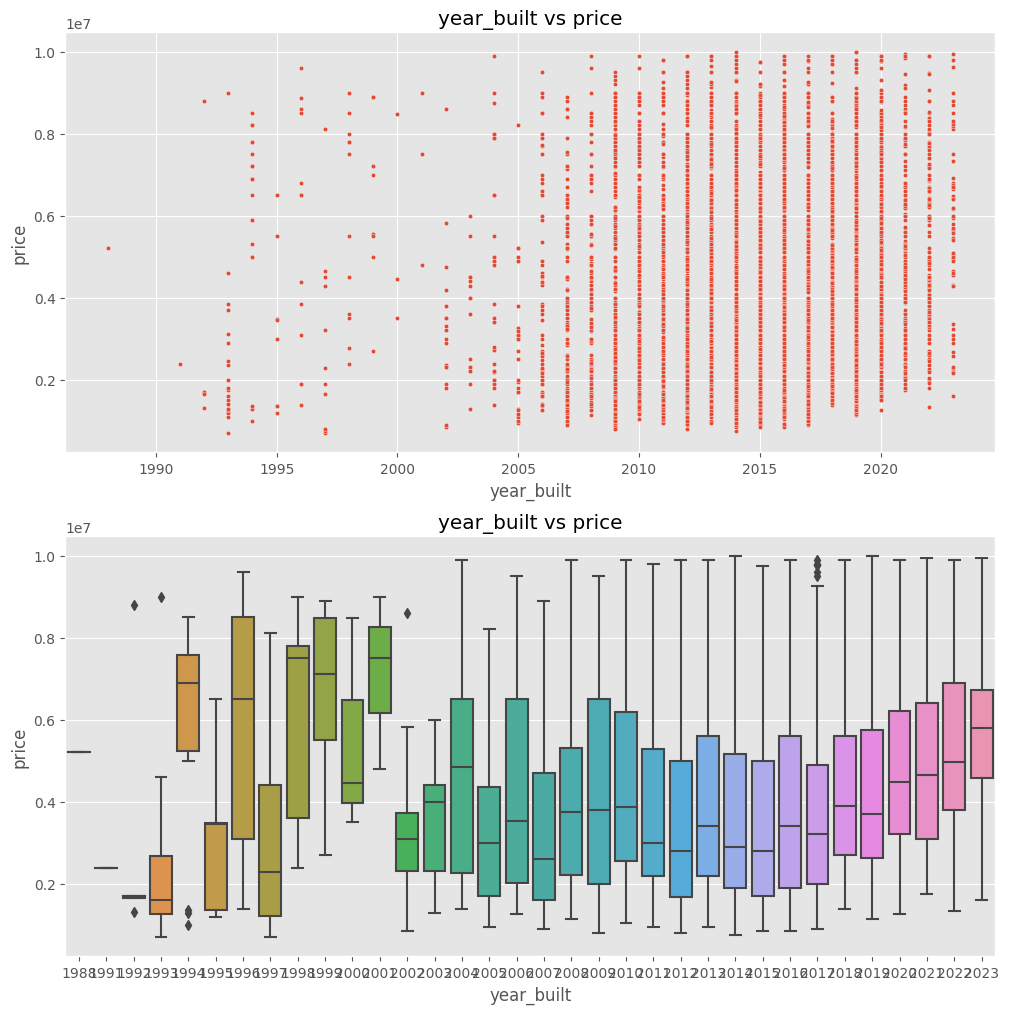

In [44]:
plt.figure(figsize=(12, 12))

# scatter plot
plt.subplot(2, 1, 1)
sns.scatterplot(x='year_built', y='price', s=10, data=df[df['year_built']!=0])
plt.title('year_built vs price');

# box plot
plt.subplot(2, 1, 2)
sns.boxplot(x='year_built', y='price', data=df[df['year_built']!=0])
plt.title('year_built vs price');

## 2.5. geographical features - `longitude` and `latitude`

- most condo are located near center of Bangkok
- some data points are out of 3 province (e.g. Pathumthani)
- price is distributed symmetricaly in scatter plot of latitude/longitude

In [45]:
# map by property type
fig = px.scatter_mapbox(
    data_frame=df.dropna(subset=['price']),
    lat="latitude",
    lon="longitude",
    hover_data=["price"],
    color="property_type",
    zoom=10,
    height=1000,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [46]:
# map by price
fig = px.scatter_mapbox(
    data_frame=df.dropna(subset=['price']),
    lat="latitude",
    lon="longitude",
    hover_data=["price"],
    color='price',
    color_continuous_scale=px.colors.sequential.Inferno_r,
    zoom=10,
    height=1000,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

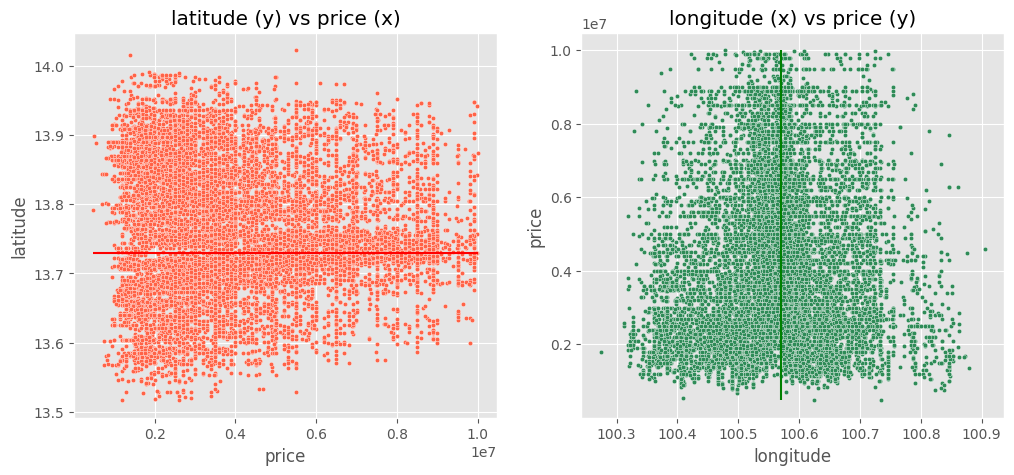

In [47]:
# self defined center point (find manually from scatterplot)
LATITUDE_CENTER = 13.73
LONGITUDE_CENTER = 100.57

plt.figure(figsize=(12, 5))

# scatter plot - latitude
# horizontal line - median
plt.subplot(1, 2, 1)
sns.scatterplot(y='latitude', x='price', s=10, data=df, c='tomato')
plt.hlines(LATITUDE_CENTER, df.price.min(), df.price.max(), colors='red')
plt.title('latitude (y) vs price (x)');

# scatter plot - latitude
# vertical line - median
plt.subplot(1, 2, 2)
sns.scatterplot(x='longitude', y='price', s=10, data=df, c='seagreen')
plt.vlines(LONGITUDE_CENTER, df.price.min(), df.price.max(), colors='green')
plt.title('longitude (x) vs price (y)');

## 2.6. correlations

### there are some clusters

- Group 1 : `bedrooms`, `baths`, `floor_area` 
    - strong correlation among group
    - positive correlation with `price`
- Group 2 : `nearby_xxx`, `year_built`
    - middle correlation among group
    - some have positive correlation with `price`
- Group 3 : `total_units`
    - negative correlation with `price`

this grouping may help to avoid multi-colinearity

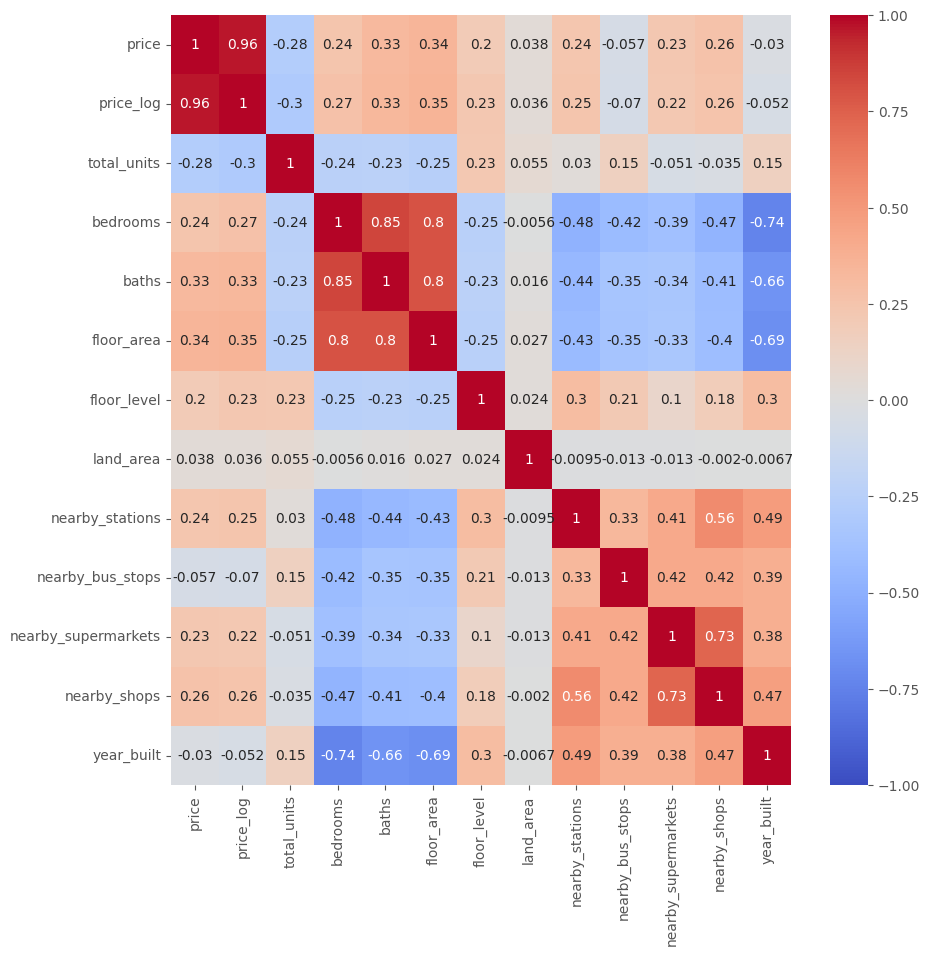

In [48]:
numerical_columns = [
    'price',
    'price_log',
    'total_units',
    'bedrooms',
    'baths',
    'floor_area',
    'floor_level',
    'land_area',
    'nearby_stations',
    'nearby_bus_stops',
    'nearby_supermarkets',
    'nearby_shops',
    'year_built',
]

plt.figure(figsize=(10, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

### `price` vs `price_log`

- slightly different : log transformed price has stronger correlations except for `nearby_supermarkets` 
- try both `price` and `price_log` later

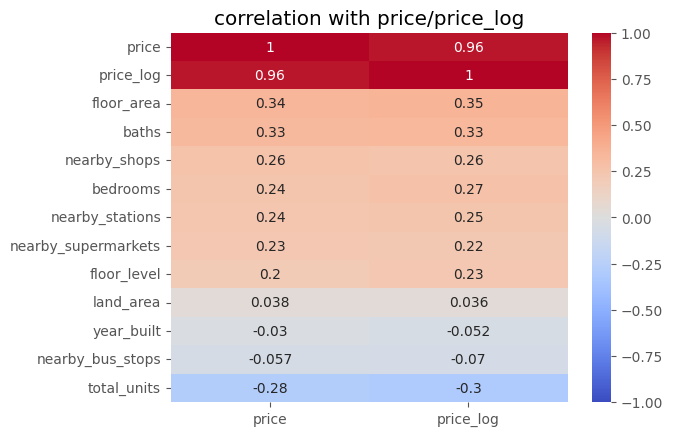

In [49]:
# take only correlations of price
corr_price = df[numerical_columns].corr()['price'].sort_values(ascending=False) # Series of correlation
corr_price_log = df[numerical_columns].corr()['price_log'] # Series of correlation

sns.heatmap(pd.concat([corr_price, corr_price_log], axis=1), annot=True, vmin=-1, vmax=True, cmap='coolwarm')
plt.title('correlation with price/price_log');

## 2.7. create new columns

> Numecical features

- `distance` - distance from center of the city. calculated by latitude and longitude
- `age` - the age of the house (2023 - `year_build`). if year_build=0, assign mean
- `closest_station_distance` - distance from the closest station. if none, assign 2000 [m]

> Categorical features

- `closest_station_name` - name of the closest station
- `has_pool` - boolean feature of whether the house has pool or not

In [50]:
def distance(row):
    # copied from 2.5. 
    LATITUDE_CENTER = 13.73 * np.pi / 180 # convert degree to radian
    LONGITUDE_CENTER = 100.57 * np.pi / 180
    lat, lon = row['latitude']*np.pi/180, row['longitude']*np.pi/180

    return 6371 * np.arccos(np.sin(lat) * np.sin(LATITUDE_CENTER) +\
        np.cos(lat) * np.cos(LATITUDE_CENTER) * np.cos(lon-LONGITUDE_CENTER))

def age(row):
    year_built = row['year_built']
    if year_built != 0:
        return 2023 - year_built
    elif row['property_type'] == 'Detached House': # mean = 2018
        return 5
    elif row['property_type'] == 'Townouse': # mean = 2017
        return 6
    
def closest_station(nearby_station, return_value='station_name'):
    if type(nearby_station) != list:
        if return_value == 'station_name':
            return "NO STATION"
        elif return_value == 'station_distance':
            return 2000
    else:
        if return_value == 'station_name':
            return nearby_station[0][0]
        elif return_value == 'station_distance':
            return nearby_station[0][1]
        
def has_pool(facilities):
    set_intersection = {'Wading pool', 'Swimming pool'} & set(facilities)
    if len(set_intersection) > 0:
        return 1
    else:
        return 0


# create new columns
df['distance'] = df.apply(distance, axis=1)
df['age'] = df.apply(age, axis=1)
df['closest_station_name'] = df.nearby_station_distance.apply(lambda x: closest_station(x, 'station_name'))
df['closest_station_distance'] = df.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))
df['has_pool'] = df.facilities.apply(has_pool)

### correlation with new columns

- `distance` : `-0.3`
- `age` : `-0.14`
- `closest_station_distance` : `-0.16`

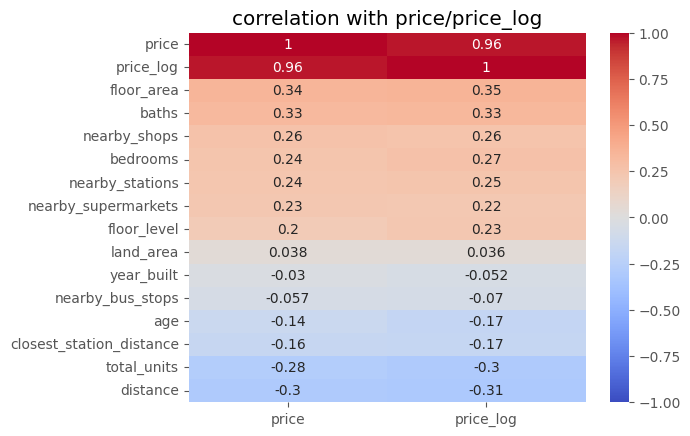

In [51]:
numerical_columns = [
    'price',
    'price_log',
    'total_units',
    'bedrooms',
    'baths',
    'floor_area',
    'floor_level',
    'land_area',
    'nearby_stations',
    'nearby_bus_stops',
    'nearby_supermarkets',
    'nearby_shops',
    'year_built',
    'distance',
    'age',
    'closest_station_distance'
]

corr_price = df[numerical_columns].corr()['price'].sort_values(ascending=False) # Series of correlation
corr_price_log = df[numerical_columns].corr()['price_log'] # Series of correlation

sns.heatmap(pd.concat([corr_price, corr_price_log], axis=1), annot=True, vmin=-1, vmax=True, cmap='coolwarm')
plt.title('correlation with price/price_log');

### `has_pool`

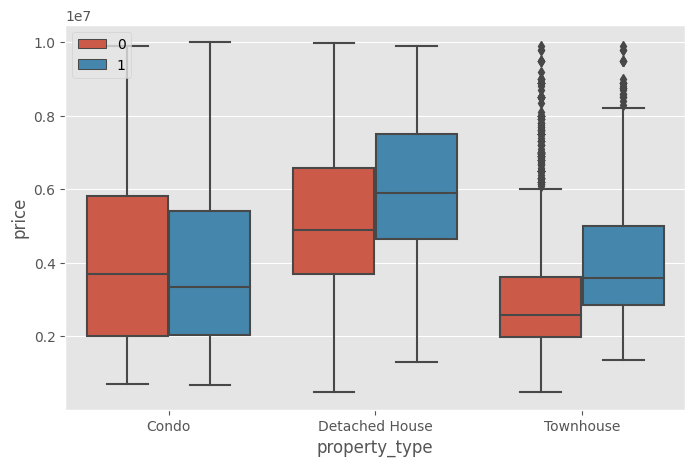

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(hue='has_pool', y='price', x='property_type', data=df)
plt.legend(loc='upper left');

### `closest_station_name`

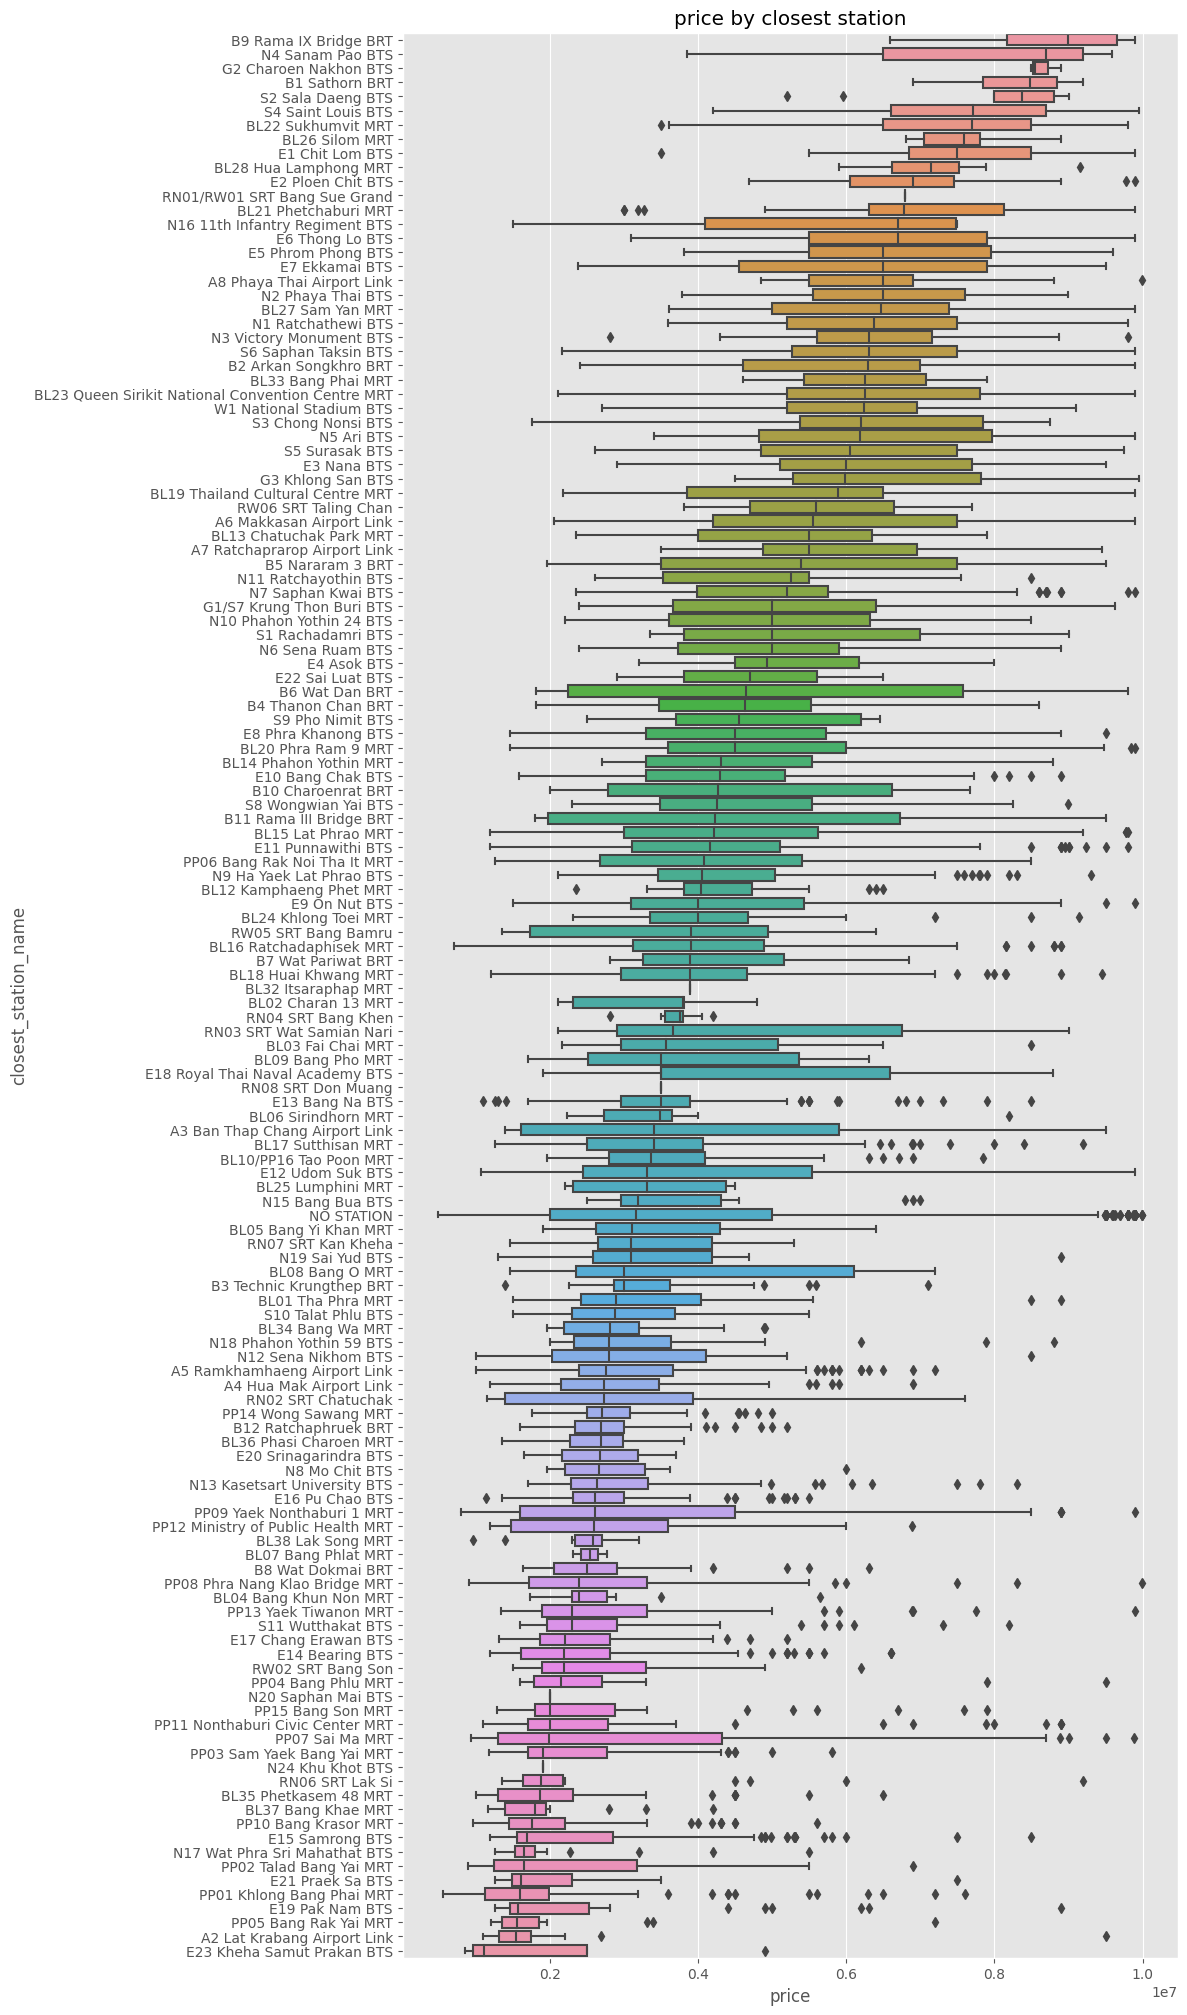

In [53]:
## boxplot by closest station 
plt.figure(figsize=(10,25))
station_order = df.groupby('closest_station_name')['price'].median().sort_values(ascending=False).index
sns.boxplot(x="price", y='closest_station_name', data=df, order=station_order)
plt.title('price by closest station');